In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Accumen challenge/TATAMOTORS.NS (2).csv",
                   parse_dates=['Date'],
                   index_col=['Date'])

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-04-06,78.185287,79.699165,77.878677,78.999718,66.239388,11477775.0
2005-04-07,79.526695,81.443001,79.143440,80.877693,67.814018,14158840.0
2005-04-08,81.443001,81.960403,80.254890,81.002251,67.918465,10284740.0
2005-04-11,79.526695,82.267014,79.162598,80.274055,67.307884,13238772.0
2005-04-12,80.676483,81.251373,79.507538,80.657318,67.629234,5348983.0


In [9]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean() 
## Calculate the Long Term Exponential Moving Average
LongEMA = df.Close.ewm(span=26, adjust=False).mean() 
## Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
## Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

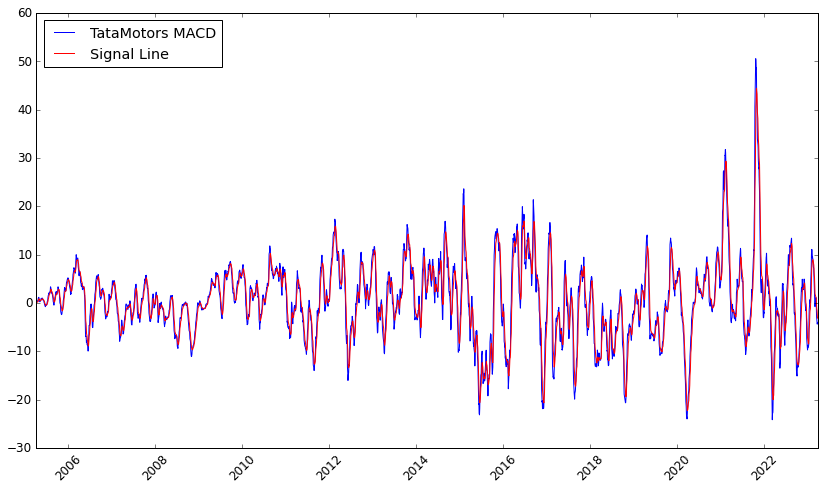

In [10]:
plt.figure(figsize=(14,8))
plt.style.use('classic')
plt.plot(df.index, MACD, label='TataMotors MACD', color = 'blue')
plt.plot(df.index, signal, label='Signal Line', color='red')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()